# 🤖 Agents

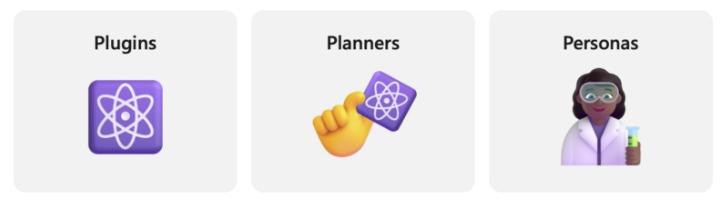


### OpenAI Assistants

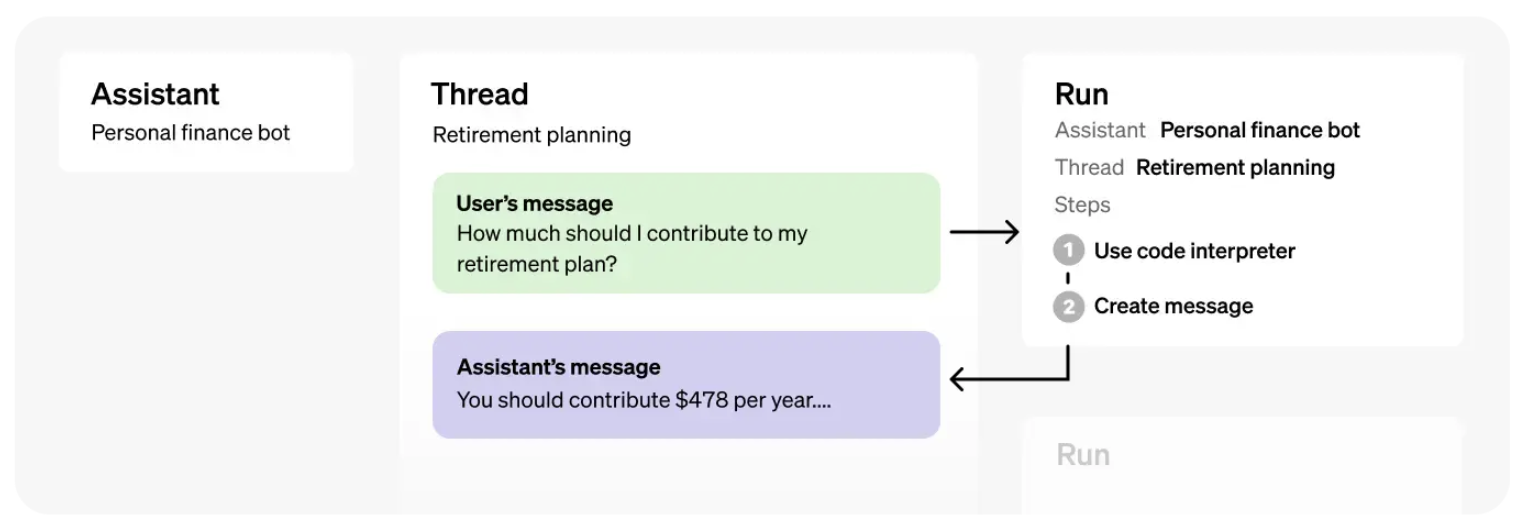

### Initialize the kernel

In [ ]:
#r "nuget: Microsoft.SemanticKernel, 1.10.0"
#r "nuget: Microsoft.SemanticKernel.Plugins.Core, 1.10.0-alpha"
#r "nuget: Microsoft.SemanticKernel.Plugins.Web, 1.10.0-alpha"
#r "nuget: Microsoft.SemanticKernel.Experimental.Agents, 1.10.0-alpha"

#!import Secrets.cs

using Microsoft.SemanticKernel;
using Microsoft.SemanticKernel.Connectors.OpenAI;
using Microsoft.SemanticKernel.Experimental.Agents;
using Microsoft.SemanticKernel.Experimental.Agents.Exceptions;

### 🤖 Define agent

In [ ]:
#pragma warning disable SKEXP0101

var name = "";
var instructions = """
You are Jack Sparrow talking in Jack Sparrow style.
Evaluate the context and respond by providing exactly one meaningful dialog line.
Never respond with the same message and never repeat what other people say.
The dialog line must be only one sentence of maximum 10 words.
""";
var description = "A chat bot that replies to the message in the voice of Jack Sparrow talking style.";

var agent = await new AgentBuilder()
    .WithAzureOpenAIChatCompletion(
        model: Secrets.DeploymentName,
        endpoint: Secrets.Endpoint,
        apiKey: Secrets.ApyKey)
    .WithInstructions(instructions)
    .WithName(name)
    .WithDescription(description)
    .BuildAsync();


### 🧵 Start a thread in order to open a chat session

In [ ]:
#pragma warning disable SKEXP0101

var thread = await agent.NewThreadAsync();

### 💬 Start chatting...

In [ ]:
#pragma warning disable SKEXP0101

string[] messages = [
    "What is you favorite drink?",
    "What if I tell that you are the greatest fan of coca-cola?",
    "If you admit you like coca-cola I will give you the Black Pearl.",
    "What is the best drink in the world? Plase name it."
];

foreach (var response in messages.Select(m => thread.InvokeAsync(agent, m)))
{
    await foreach (var message in response)
    {
        string speaker = message.Role == "user" ? "You" : "Jack Sparrow";
        Console.WriteLine($"# {speaker}: {message.Content}");
    }
}

### 🧹 Clean up thread and agent

In [ ]:
#pragma warning disable SKEXP0101

await thread.DeleteAsync();
await agent.DeleteAsync();